In [1]:
import pandas as pd
import numpy as np

import contractions
import emoji
import string 
import re

import matplotlib.pyplot as plt
import seaborn as sn

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

from wordcloud import WordCloud


[nltk_data] Downloading package punkt to /Users/bryson/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/bryson/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bryson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Remove emojis 
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  
        u"\U0001F300-\U0001F5FF"  
        u"\U0001F680-\U0001F6FF"  
        u"\U0001F1E0-\U0001F1FF" 
        u"\U00002500-\U00002BEF"  
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

def remove_stopwords(reviews):
    STOPWORDS = stopwords.words('english')
    STOPWORDS.remove('not')
    STOPWORDS.remove('is')
    STOPWORDS.remove('but')
    if STOPWORDS is None:
        STOPWORDS = set(stopwords.words('english'))
    return ' '.join([word for word in reviews.split() if word not in STOPWORDS])

def remove_extra_whitespace(reviews):
    return " ".join(reviews.split())

def get_wordnet_pos(text):
    # Map POS tag to first character lemmatize() accepts
    tags = nltk.pos_tag(text)
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    tags = [tag_dict.get(tag[1][0],  wordnet.NOUN) for tag in tags]
    return tags

def lemmaSentence(reviews):
    lemmatizer = WordNetLemmatizer()
    lemma_text = ''
    tok_text = word_tokenize(reviews)
    tags = get_wordnet_pos(tok_text)
    for i in range(len(tok_text)):
        lemma_text = lemma_text + ' ' + lemmatizer.lemmatize(tok_text[i], tags[i])
    return lemma_text[1:]

def lower_case(review):
    
    return review.lower()

# change contraction words such sa I'm = I am, shouldn't = should not
def change_contractions(review):
    
    expanded_words = [contractions.fix(word) for word in review.split()]

    expanded_review = ' '.join(expanded_words)
    return expanded_review

# Remove Punctuations
def remove_punctuations(review):
  
  regex = re.compile('[^a-zA-Z0-9]')
  #first parameter is the replacement, second parameter is your input string
  new_review = regex.sub(' ', review)
  return new_review

# Remove numbers
def remove_numbers(review):
    
    mapping = str.maketrans('', '', string.digits)
    new_review = review.translate(mapping)
    
    return new_review

In [4]:

def clean_text(data):

    data['concat_review'] = data['concat_review'].apply(lower_case)
    data['concat_review'] = data['concat_review'].apply(change_contractions)
    data['concat_review'] = data['concat_review'].apply(remove_emojis)
    data['concat_review'] = data['concat_review'].apply(remove_punctuations)
    data['concat_review'] = data['concat_review'].apply(remove_numbers)
    data['concat_review'] = data['concat_review'].apply(remove_stopwords)
    data['concat_review'] = data['concat_review'].apply(remove_extra_whitespace)
    data['concat_review'] = data['concat_review'].apply(lemmaSentence)
    
    return data

## Pre-processing of Raw Dataset

In [5]:
# Pre-processing of dataset
data = pd.read_csv('raw_dataset/raw_dataset_dr_english_only.csv')
data['concat_review'] = data["reviewTitle"] + ". " + data["reviewDescription"]
data['concat_review'] = data['concat_review'].astype(str)

clean_df = clean_text(data)
clean_df

,productAsin,ratingScore,reviewTitle,reviewReaction,reviewDescription,isVerified,category,languages,concat_review,polarity
0,1542046599,1,More gripes than hypes,One person found this helpful,This is the first book I‚Äö√Ñ√¥ve read by this...,True,mystery,Language.ENGLISH,gripe hype be first book read author think wou...,-1
1,63215381,1,The paperback‚Äö√Ñ√¥s quality sucks,1,I hate this paperback. Terrible quality! The p...,True,children,Language.ENGLISH,paperback quality suck hate paperback terrible...,-1
2,1250069831,1,Do not waste your time,NaN,There was nothing good about this book. From s...,True,humor_entertainment,Language.ENGLISH,not waste time nothing good book start finish ...,-1
3,525522131,1,The worst - would not recommend!! :(,2,This was the worst - trying too hard to be fun...,True,humor_entertainment,Language.ENGLISH,worst would not recommend bad try hard funny r...,-1
4,399255370,1,Just complaining. My kids don't need lessons i...,5,I picked this up for my 5 and 3 year old sons ...,False,children,Language.ENGLISH,complain kid not need lesson pick year old son...,-1
...,...,...,...,...,...,...,...,...,...,...
23286,1501128019,5,It has been YEARS since I have finished 400 pa...,NaN,Love and Other Words by Christina Lauren.This ...,False,romance,Language.ENGLISH,year since finish page book less hour love wor...,1
23287,1501128019,5,Heartfelt and emotional,NaN,Love and Other Words was Christina Lauren‚Äö√Ñ...,True,romance,Language.ENGLISH,heartfelt emotional love word christina lauren...,1
23288,B08NLXR9V5,5,Great story,NaN,"All the mystery of who done it, the actual pro...",True,mystery,Language.ENGLISH,great story mystery do actual profiling killer...,1
23289,B08NLXR9V5,5,Indpeth,NaN,"Truly griping , well written and so very well ...",True,mystery,Language.ENGLISH,indpeth truly grip well write well researchedl...,1


 1    15765
-1     6446
 0     1080
Name: polarity, dtype: int64


Text(0, 0.5, 'Frequency')

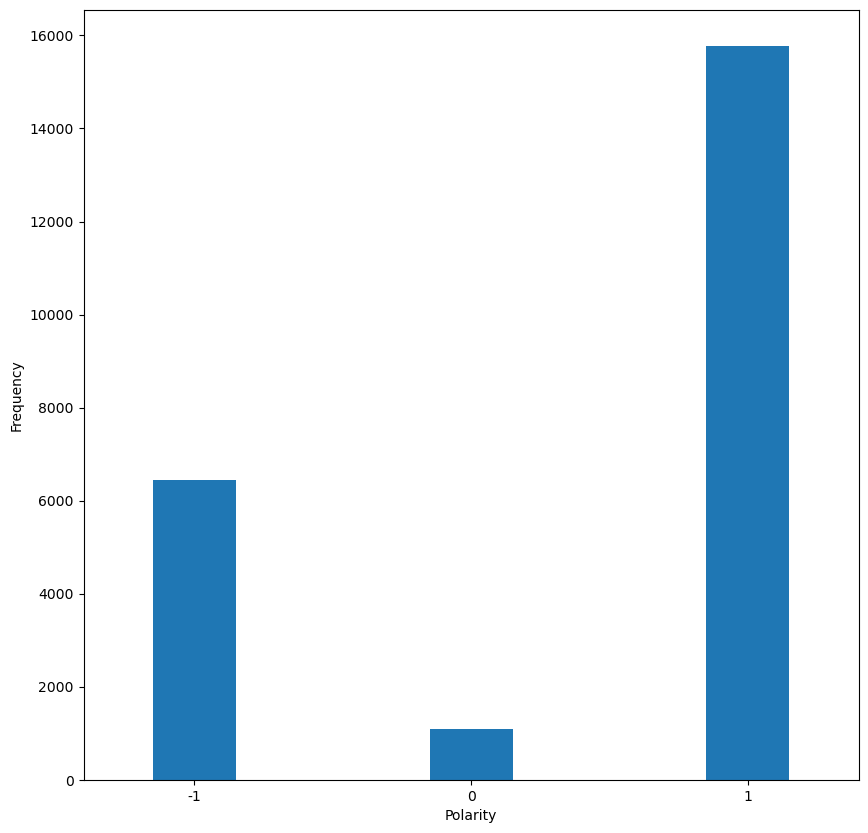

In [6]:
# Check if the dataset is balanced
print(clean_df["polarity"].value_counts())

clean_df['polarity'].value_counts(sort=False).plot.bar(figsize=(10,10), width = 0.3, rot=0)
plt.xlabel('Polarity')
plt.ylabel('Frequency')

## Crawled Data Words Distribution

In [8]:
no_of_words = 0
unique_words = set()
for review in clean_df["concat_review"]:
    word_list = str(review).split()
    no_of_words += len(word_list)
    for word in word_list:
        unique_words.add(word)

print('Number of words: ' + str(no_of_words))
print('Number of unique words: ' + str(len(unique_words)))

Number of words: 797797
Number of unique words: 20915


## Visualization of Dataset Aspect

In [9]:
def get_wordcloud(text, color='viridis'):
  # Create a WordCloud object
  
  wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue', colormap=color)
  # Generate a word cloud
  return wordcloud.generate(text)

### 50 Most Frequent Words in Product Reviews of Book Category 'Children'

(-0.5, 399.5, 199.5, -0.5)

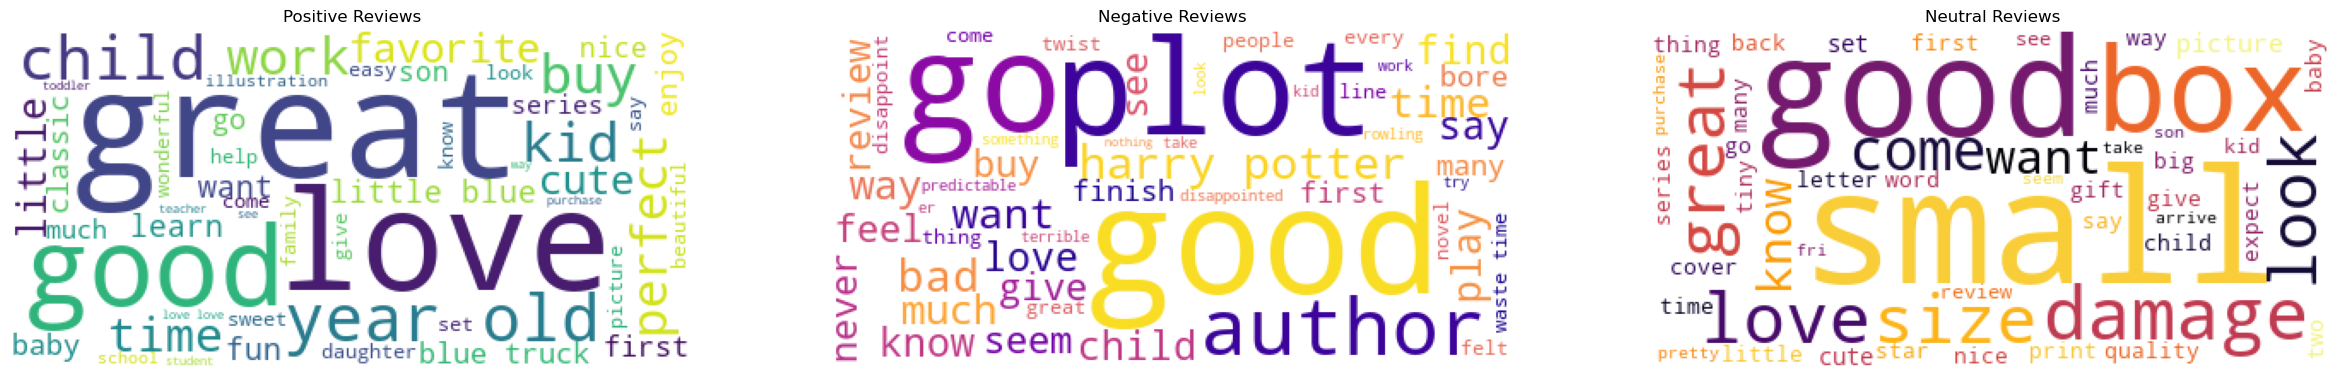

In [10]:
fig, axes =plt.subplots(1,3, figsize=(30,30))

# Wordcloud for positive reviews
pos_reviews = ' '.join(clean_df['concat_review'][clean_df['polarity']==1][clean_df['category']=='children'].values)
words = ['well', 'make', 'book', 'use', 'read', 'write','story', 'character', 'page', 'really', 'actually', 'start', 'end', 'think', 'one', 'even']
for word in words:
  pos_reviews = pos_reviews.replace(word, '')

axes[0].set_title("Positive Reviews")
axes[0].imshow(get_wordcloud(pos_reviews))
axes[0].axis('off')

# Wordcloud for negative reviews
neg_reviews = ' '.join(clean_df['concat_review'][clean_df['polarity']==-1][clean_df['category']=='children'].values)
words = ['well', 'make', 'book', 'use', 'read', 'write','story', 'character', 'page', 'really', 'actually', 'start', 'end', 'think', 'one', 'even']
for word in words:
  neg_reviews = neg_reviews.replace(word, '')

axes[1].set_title("Negative Reviews")
axes[1].imshow(get_wordcloud(neg_reviews,'plasma'))
axes[1].axis('off')

# Wordcloud for neutral reviews
neutral_reviews = ' '.join(clean_df['concat_review'][clean_df['polarity']==0][clean_df['category']=='children'].values)
words = ['well', 'make', 'book', 'use', 'read', 'write','story', 'character', 'page', 'really', 'actually', 'start', 'end', 'think', 'one', 'even']
for word in words:
  neutral_reviews = neutral_reviews.replace(word, '')

axes[2].set_title("Neutral Reviews")
axes[2].imshow(get_wordcloud(neutral_reviews, 'inferno'))
axes[2].axis('off')




### 50 Most Frequent Words in Product Reviews of Book Category 'Humor & Entertainment'

(-0.5, 399.5, 199.5, -0.5)

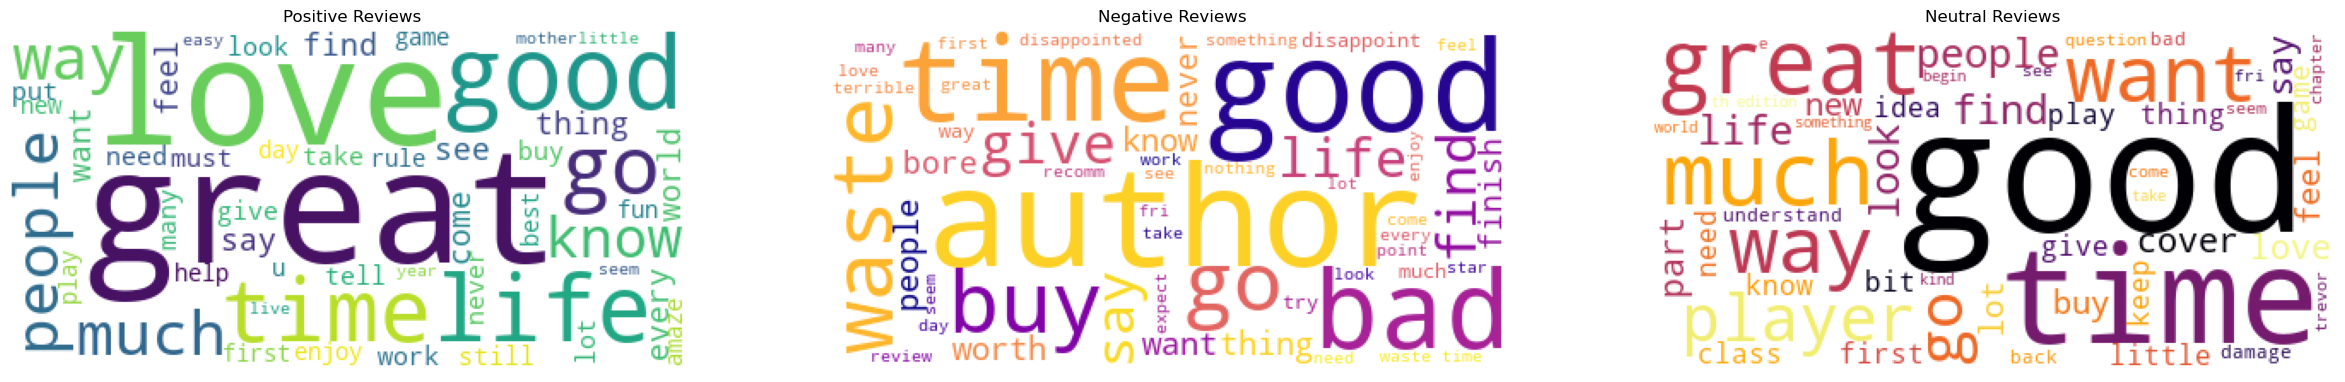

In [11]:
fig, axes =plt.subplots(1,3, figsize=(30,30))

# Wordcloud for positive reviews
pos_reviews = ' '.join(clean_df['concat_review'][clean_df['polarity']==1][clean_df['category']=='humor_entertainment'].values)
words = ['well', 'make', 'book', 'use', 'read', 'write','story', 'character', 'page', 'really', 'actually', 'start', 'end', 'think', 'one', 'even']
for word in words:
  pos_reviews = pos_reviews.replace(word, '')

axes[0].set_title("Positive Reviews")
axes[0].imshow(get_wordcloud(pos_reviews))
axes[0].axis('off')

# Wordcloud for negative reviews
neg_reviews = ' '.join(clean_df['concat_review'][clean_df['polarity']==-1][clean_df['category']=='humor_entertainment'].values)
words = ['well', 'make', 'book', 'use', 'read', 'write','story', 'character', 'page', 'really', 'actually', 'start', 'end', 'think', 'one', 'even']
for word in words:
  neg_reviews = neg_reviews.replace(word, '')

axes[1].set_title("Negative Reviews")
axes[1].imshow(get_wordcloud(neg_reviews,'plasma'))
axes[1].axis('off')

# Wordcloud for neutral reviews
neutral_reviews = ' '.join(clean_df['concat_review'][clean_df['polarity']==0][clean_df['category']=='humor_entertainment'].values)
words = ['well', 'make', 'book', 'use', 'read', 'write','story', 'character', 'page', 'really', 'actually', 'start', 'end', 'think', 'one', 'even']
for word in words:
  neutral_reviews = neutral_reviews.replace(word, '')

axes[2].set_title("Neutral Reviews")
axes[2].imshow(get_wordcloud(neutral_reviews, 'inferno'))
axes[2].axis('off')




### 50 Most Frequent Words in Product Reviews of Book Category 'Mystery'

(-0.5, 399.5, 199.5, -0.5)

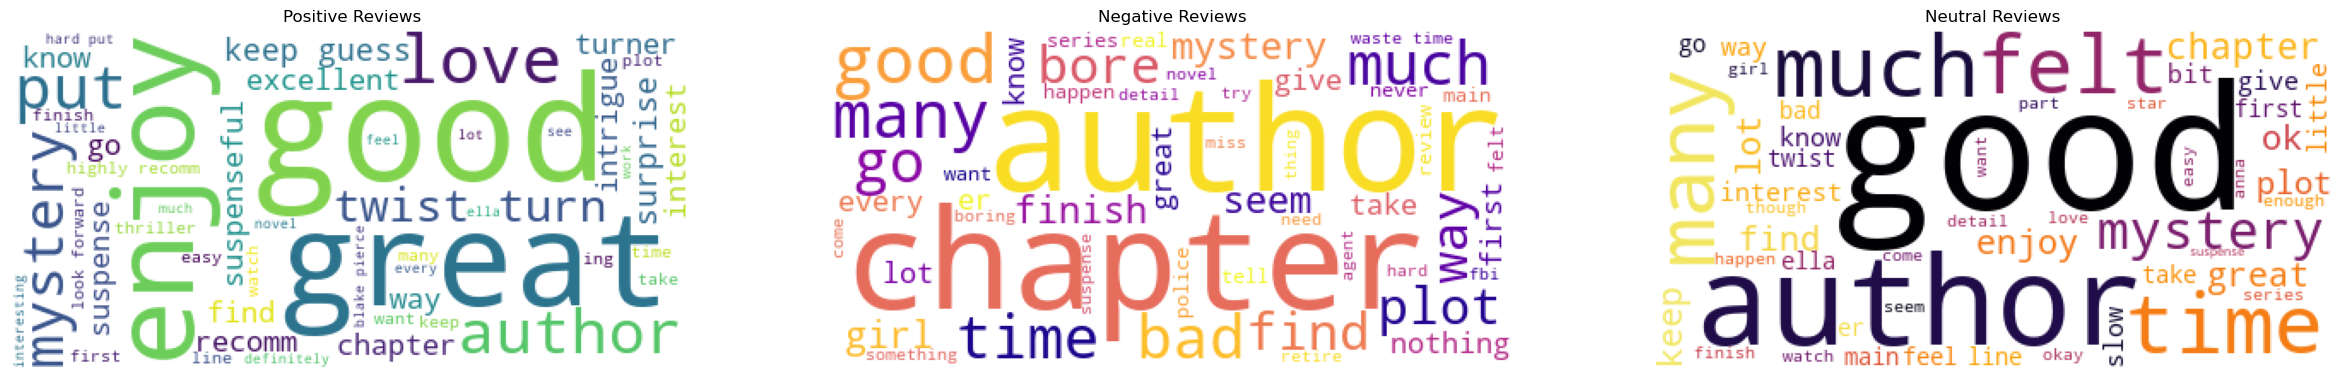

In [12]:
fig, axes =plt.subplots(1,3, figsize=(30,30))

# Wordcloud for positive reviews
pos_reviews = ' '.join(clean_df['concat_review'][clean_df['polarity']==1][clean_df['category']=='mystery'].values)
words = ['well', 'make', 'book', 'use', 'read', 'write','story', 'character', 'page', 'really', 'actually', 'start', 'end', 'think', 'one', 'even']
for word in words:
  pos_reviews = pos_reviews.replace(word, '')

axes[0].set_title("Positive Reviews")
axes[0].imshow(get_wordcloud(pos_reviews))
axes[0].axis('off')

# Wordcloud for negative reviews
neg_reviews = ' '.join(clean_df['concat_review'][clean_df['polarity']==-1][clean_df['category']=='mystery'].values)
words = ['well', 'make', 'book', 'use', 'read', 'write','story', 'character', 'page', 'really', 'actually', 'start', 'end', 'think', 'one', 'even']
for word in words:
  neg_reviews = neg_reviews.replace(word, '')

axes[1].set_title("Negative Reviews")
axes[1].imshow(get_wordcloud(neg_reviews,'plasma'))
axes[1].axis('off')

# Wordcloud for neutral reviews
neutral_reviews = ' '.join(clean_df['concat_review'][clean_df['polarity']==0][clean_df['category']=='mystery'].values)
words = ['well', 'make', 'book', 'use', 'read', 'write','story', 'character', 'page', 'really', 'actually', 'start', 'end', 'think', 'one', 'even']
for word in words:
  neutral_reviews = neutral_reviews.replace(word, '')

axes[2].set_title("Neutral Reviews")
axes[2].imshow(get_wordcloud(neutral_reviews, 'inferno'))
axes[2].axis('off')




### 50 Most Frequent Words in Product Reviews of Book Category 'Romance'

(-0.5, 399.5, 199.5, -0.5)

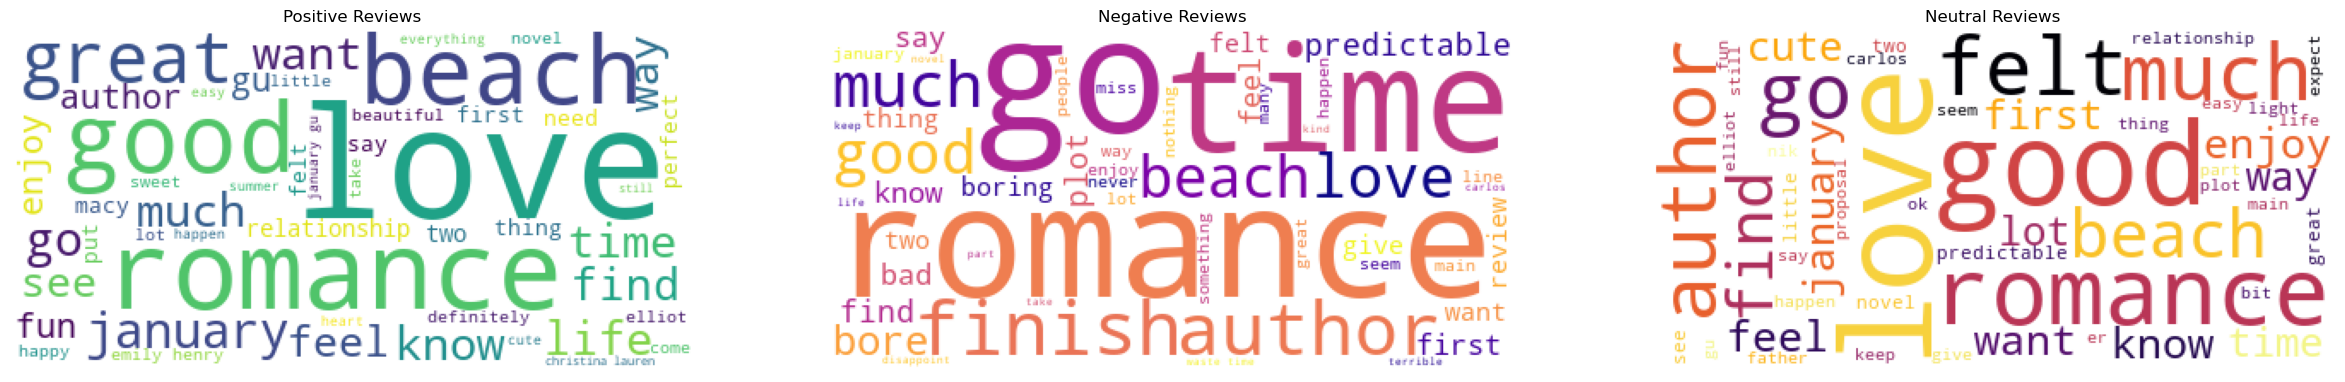

In [13]:
fig, axes =plt.subplots(1,3, figsize=(30,30))

# Wordcloud for positive reviews
pos_reviews = ' '.join(clean_df['concat_review'][clean_df['polarity']==1][clean_df['category']=='romance'].values)
words = ['well', 'make', 'book', 'use', 'read', 'write','story', 'character', 'page', 'really', 'actually', 'start', 'end', 'think', 'one', 'even']
for word in words:
  pos_reviews = pos_reviews.replace(word, '')

axes[0].set_title("Positive Reviews")
axes[0].imshow(get_wordcloud(pos_reviews))
axes[0].axis('off')

# Wordcloud for negative reviews
neg_reviews = ' '.join(clean_df['concat_review'][clean_df['polarity']==-1][clean_df['category']=='romance'].values)
words = ['well', 'make', 'book', 'use', 'read', 'write','story', 'character', 'page', 'really', 'actually', 'start', 'end', 'think', 'one', 'even']
for word in words:
  neg_reviews = neg_reviews.replace(word, '')

axes[1].set_title("Negative Reviews")
axes[1].imshow(get_wordcloud(neg_reviews,'plasma'))
axes[1].axis('off')

# Wordcloud for neutral reviews
neutral_reviews = ' '.join(clean_df['concat_review'][clean_df['polarity']==0][clean_df['category']=='romance'].values)
words = ['well', 'make', 'book', 'use', 'read', 'write','story', 'character', 'page', 'really', 'actually', 'start', 'end', 'think', 'one', 'even']
for word in words:
  neutral_reviews = neutral_reviews.replace(word, '')

axes[2].set_title("Neutral Reviews")
axes[2].imshow(get_wordcloud(neutral_reviews, 'inferno'))
axes[2].axis('off')




### 50 Most Frequent Words in Product Reviews of All Books

(-0.5, 399.5, 199.5, -0.5)

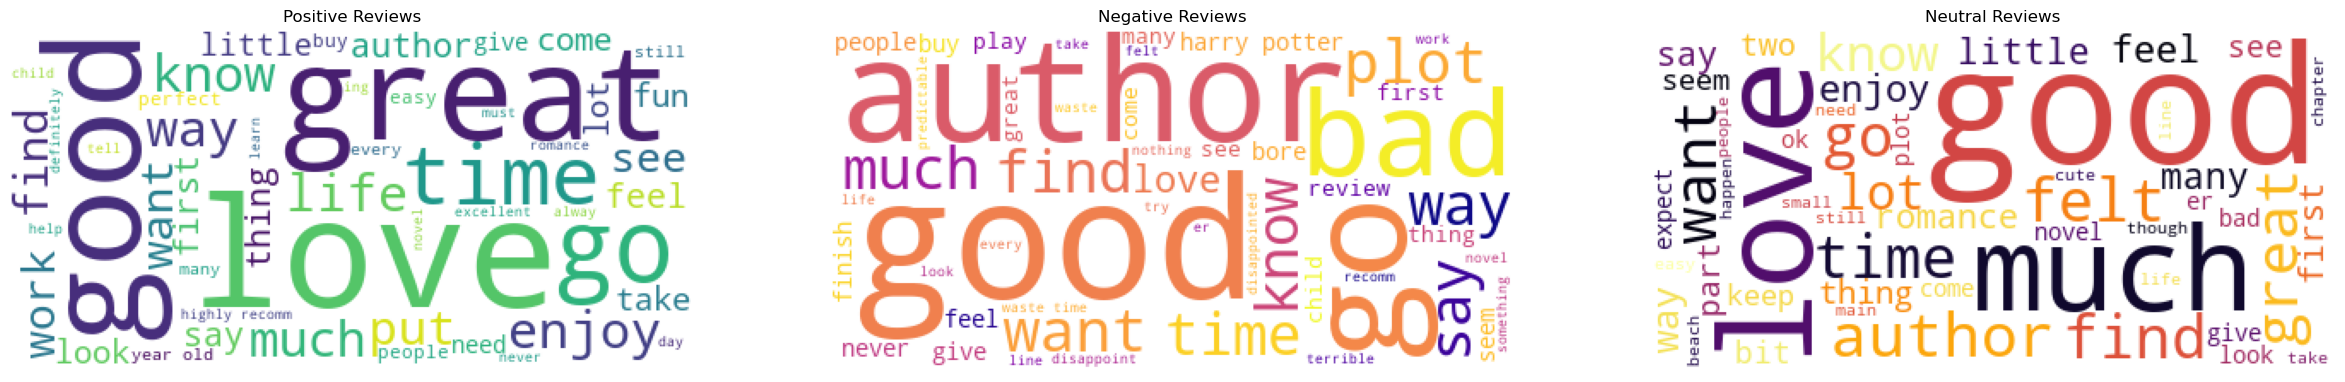

In [14]:
fig, axes =plt.subplots(1,3, figsize=(30,30))

# Wordcloud for positive reviews
pos_reviews = ' '.join(clean_df['concat_review'][clean_df['polarity']==1].values)
words = ['well', 'make', 'book', 'use', 'read', 'write','story', 'character', 'page', 'really', 'actually', 'start', 'end', 'think', 'one', 'even']
for word in words:
  pos_reviews = pos_reviews.replace(word, '')

axes[0].set_title("Positive Reviews")
axes[0].imshow(get_wordcloud(pos_reviews))
axes[0].axis('off')

# Wordcloud for negative reviews
neg_reviews = ' '.join(clean_df['concat_review'][clean_df['polarity']==-1].values)
words = ['well', 'make', 'book', 'use', 'read', 'write','story', 'character', 'page', 'really', 'actually', 'start', 'end', 'think', 'one', 'even']
for word in words:
  neg_reviews = neg_reviews.replace(word, '')

axes[1].set_title("Negative Reviews")
axes[1].imshow(get_wordcloud(neg_reviews,'plasma'))
axes[1].axis('off')

# Wordcloud for neutral reviews
neutral_reviews = ' '.join(clean_df['concat_review'][clean_df['polarity']==0].values)
words = ['well', 'make', 'book', 'use', 'read', 'write','story', 'character', 'page', 'really', 'actually', 'start', 'end', 'think', 'one', 'even']
for word in words:
  neutral_reviews = neutral_reviews.replace(word, '')

axes[2].set_title("Neutral Reviews")
axes[2].imshow(get_wordcloud(neutral_reviews, 'inferno'))
axes[2].axis('off')


